### 1. Import Libraries and Load Data

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
property_data=pd.read_csv('Property.csv', sep=';')

### 2. Data Overview & Quality Check

**Top Five Rows**

In [84]:
property_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN


**Last Five Rows**

In [85]:
property_data.tail()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,3,07-24-2019,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,2,07-24-2019,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,G-10,Islamabad,Islamabad Capital,33.676104,73.013842,6,1 Kanal,For Rent,6,07-24-2019,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,2,2.7 Marla,For Rent,2,07-24-2019,New National Properties,TALHA MIAN AHMAD
191392,17468660,3421,https://www.zameen.com/Property/i_10_i_10_2_i_...,Upper Portion,26000,I-10,Islamabad,Islamabad Capital,33.649779,73.029385,1,0 Marla,For Rent,3,07-24-2019,Select Homes,"Qaiser Shahzad, Chaudhary Waseem"


**Dimenssions of data**

In [86]:
property_data.shape

(191393, 17)

In [87]:
rows_columns=property_data.shape

rows=property_data.shape[0]
columns=property_data.shape[1]

print(rows_columns)
print('rows:',rows)
print('columns:',columns)

(191393, 17)
rows: 191393
columns: 17


**Features in data**

In [88]:
data_column = property_data.columns
data_column

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent'],
      dtype='object')

**Data Quality**

In [89]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   location       191393 non-null  object 
 6   city           191393 non-null  object 
 7   province_name  191393 non-null  object 
 8   latitude       191393 non-null  float64
 9   longitude      191393 non-null  float64
 10  baths          191393 non-null  int64  
 11  area           191393 non-null  object 
 12  purpose        191393 non-null  object 
 13  bedrooms       191393 non-null  int64  
 14  date_added     191393 non-null  object 
 15  agency         144014 non-null  object 
 16  agent          144013 non-null  object 
dtypes: float64(2), int64(5), obje

**Property Type Counts**

In [90]:
property_type = property_data['property_type'].value_counts().reset_index()
property_type.columns = ['Property Type', 'Count']
property_type

,Property Type,Count
0,House,118915
1,Flat,40157
2,Upper Portion,18475
3,Lower Portion,11693
4,Room,1029
5,Farm House,725
6,Penthouse,399


**Statistical Summary**

In [91]:
property_data.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,1.913930e+05,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000
mean,1.573170e+07,4224.580350,1.644655e+07,30.104593,71.572992,2.865956,3.171516
std,2.215249e+06,3719.125201,3.416412e+07,3.645941,3.080463,2.435332,1.952403
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.511867e+07,1057.000000,8.000000e+04,24.972287,67.152597,0.000000,2.000000
50%,1.676385e+07,3233.000000,7.300000e+06,31.463563,73.077743,3.000000,3.000000
75%,1.715282e+07,7182.000000,1.800000e+07,33.550869,74.228218,4.000000,4.000000
max,1.769386e+07,14246.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000


In [92]:
property_data.describe(include=['O'])

,page_url,property_type,location,city,province_name,area,purpose,date_added,agency,agent
count,191393,191393,191393,191393,191393,191393,191393,191393,144014,144013
unique,191393,7,1536,5,3,352,2,148,5923,11352
top,https://www.zameen.com/Property/lahore_model_t...,House,DHA Defence,Karachi,Punjab,1 Kanal,For Sale,07-03-2019,Mash Allah Estate & Builders,Azam Ali
freq,1,118915,26161,60484,90714,25452,127018,10400,821,797


### 3. Data Cleaning & Preparation

**Null Value Identification**

In [93]:
property_data.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           47379
agent            47380
dtype: int64

**Keep only relevant columns**

In [94]:
relevant_columns = ['property_type',
    'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
    'baths', 'bedrooms', 'date_added','area', 'purpose', 'agency', 'agent'
]

property_data_cleaned = property_data[relevant_columns]
property_data_cleaned.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,bedrooms,date_added,area,purpose,agency,agent
0,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,0,07-17-2019,6 Kanal,For Sale,Real Biz International,Usama Khan
1,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,5,10-06-2018,1 Kanal,For Sale,Khan Estate,mohsinkhan and B
2,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,3,07-03-2019,9 Marla,For Sale,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,8,04-04-2019,1 Kanal,For Sale,NaN,NaN
4,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,6,04-04-2019,11 Marla,For Sale,NaN,NaN


**Fill Null/NA values by Unknown in Place of Strings and mean at the place of Numericals**

In [95]:
property_data['agency'] = property_data['agency'].fillna('Unknown')
property_data['agent'] = property_data['agent'].fillna('Unknown')

numeric_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms']

for column in numeric_columns:
    if property_data[column].isnull().any():
        mean_value = property_data[column].mean()
        property_data[column].fillna(mean_value, inplace=True)


Check if missing values have been imputed


In [96]:
property_data.isna().sum()
# property_data.isnull().sum()

property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
dtype: int64

In [97]:
property_data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,Unknown,Unknown
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,Unknown,Unknown


#### Data Transformation

As the area column is in different units so we need to transform that in a single unit, here we're extracting the number and text and then creating a columns to separately managing these values

In [98]:
# Extract numeric part
property_data_cleaned['area_value'] = property_data_cleaned['area'].str.extract(r'(\d+(\.\d+)?)', expand=False)[0].astype(float)

# Extract unit part (Kanal or Marla)
property_data_cleaned['area_unit'] = property_data_cleaned['area'].str.extract(r'([Kk]anal|[Mm]arla)', expand=False)

# Normalize
property_data_cleaned['area_unit'] = property_data_cleaned['area_unit'].str.lower()

# Convert area to Marla: 1 Kanal = 20 Marla
property_data_cleaned['area_in_marla'] = property_data_cleaned.apply(
    lambda row: row['area_value'] * 20 if row['area_unit'] == 'kanal' else row['area_value'],
    axis=1)
property_data_cleaned.head()


,property_type,price,location,city,province_name,latitude,longitude,baths,bedrooms,date_added,area,purpose,agency,agent,area_value,area_unit,area_in_marla
0,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,0,07-17-2019,6 Kanal,For Sale,Real Biz International,Usama Khan,6.0,kanal,120.0
1,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,5,10-06-2018,1 Kanal,For Sale,Khan Estate,mohsinkhan and B,1.0,kanal,20.0
2,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,3,07-03-2019,9 Marla,For Sale,Shahum Estate 2,"Babar Hameed, Raja Omar",9.0,marla,9.0
3,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,8,04-04-2019,1 Kanal,For Sale,NaN,NaN,1.0,kanal,20.0
4,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,6,04-04-2019,11 Marla,For Sale,NaN,NaN,11.0,marla,11.0


**Again selecting the columns as in previous we added two other columns for the manupulations of area, those columns are not useful**

In [99]:
cleaned_columns = ['property_type',
    'price', 'location', 'city', 'province_name',
    'latitude', 'longitude', 'baths', 'bedrooms', 'date_added',
    'purpose', 'agency', 'agent', 'area_in_marla'
]
final_cleaned_data = property_data_cleaned[cleaned_columns]

In [100]:
final_cleaned_data.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,bedrooms,date_added,purpose,agency,agent,area_in_marla
0,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,0,07-17-2019,For Sale,Real Biz International,Usama Khan,120.0
1,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,5,10-06-2018,For Sale,Khan Estate,mohsinkhan and B,20.0
2,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,3,07-03-2019,For Sale,Shahum Estate 2,"Babar Hameed, Raja Omar",9.0
3,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,8,04-04-2019,For Sale,NaN,NaN,20.0
4,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,6,04-04-2019,For Sale,NaN,NaN,11.0


### 4. Outlier Detection & Feature Engineering

**Looking for outliers on numeric data only**

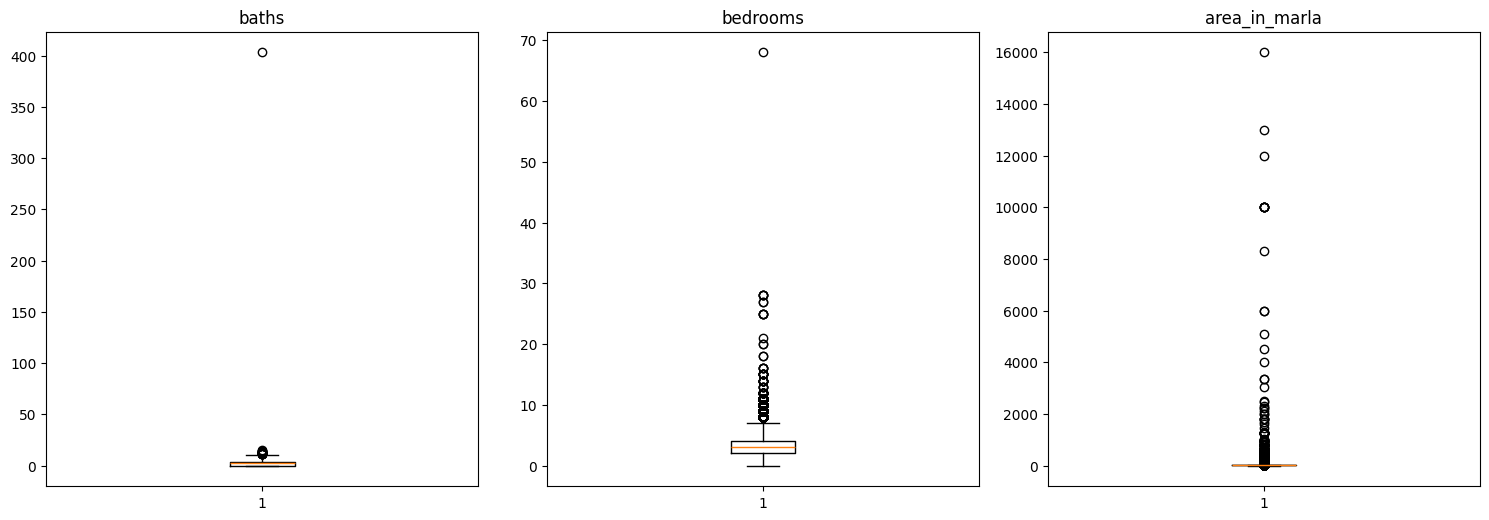

In [101]:
numeric_columns = ['baths', 'bedrooms', 'area_in_marla']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    plt.boxplot(final_cleaned_data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

#1. Baths
*  The baths column also contains a few extreme outliers.
The majority of properties have between 0 to 10 baths, but there are properties with over 400 baths, which is highly unusual and could be a data entry error or a very large property complex.

#2. Bedrooms
*  Similar to baths, the bedrooms column shows most properties have between 0 to 10 bedrooms.
*  However, there is an outlier with 68 bedrooms, which stands out significantly from the rest of the data.

#3. Area in Marla
*  The area_in_marla column shows most properties have a
relatively small area, but there are outliers with areas exceeding 10,000 marlas.

*   This indicates the presence of some very large properties or possibly data entry errors.

**Counting the Property Count per year from each city and sorting using descending**

In [102]:
# convert date_added to datetime, create year_added

final_cleaned_data['date_added'] = pd.to_datetime(final_cleaned_data['date_added'], errors='coerce', format='%m-%d-%Y')
final_cleaned_data['year_added'] = final_cleaned_data['date_added'].dt.year
properties_per_year = final_cleaned_data.groupby(['city', 'year_added']).size().reset_index(name='property_count').sort_values(by='property_count', ascending=False)
properties_per_year

# properties per year per city

,city,year_added,property_count
7,Lahore,2019,55855
5,Karachi,2019,55598
3,Islamabad,2019,37921
9,Rawalpindi,2019,21365
1,Faisalabad,2019,8345
4,Karachi,2018,4886
6,Lahore,2018,2881
2,Islamabad,2018,2274
8,Rawalpindi,2018,1533
0,Faisalabad,2018,735


### 5. Exploratory Analysis & Insights

Manually Checking the Trend on prices eaither they are yearly increasing or decreasing

In [103]:
price_trend = final_cleaned_data.groupby(['city', 'year_added'])['price'].mean().reset_index()


# calculating the previous year's price just ot compare
price_trend['previous_year_price'] = price_trend.groupby('city')['price'].shift(1)
price_trend['trend'] = 'No Change'
price_trend.loc[price_trend['price'] > price_trend['previous_year_price'], 'trend'] = 'Increasing'
price_trend.loc[price_trend['price'] < price_trend['previous_year_price'], 'trend'] = 'Decreasing'


# Drop the previous_year column becasue this was just a helper
price_trend = price_trend.drop(columns=['previous_year_price'])
price_trend

,city,year_added,price,trend
0,Faisalabad,2018,8.645399e+06,No Change
1,Faisalabad,2019,8.044504e+06,Decreasing
2,Islamabad,2018,1.252582e+07,No Change
3,Islamabad,2019,1.353827e+07,Increasing
4,Karachi,2018,1.501130e+07,No Change
5,Karachi,2019,2.026308e+07,Increasing
6,Lahore,2018,1.808553e+07,No Change
7,Lahore,2019,1.951498e+07,Increasing
8,Rawalpindi,2018,1.044418e+07,No Change
9,Rawalpindi,2019,8.160278e+06,Decreasing


**Visualizing the average prices and areas**

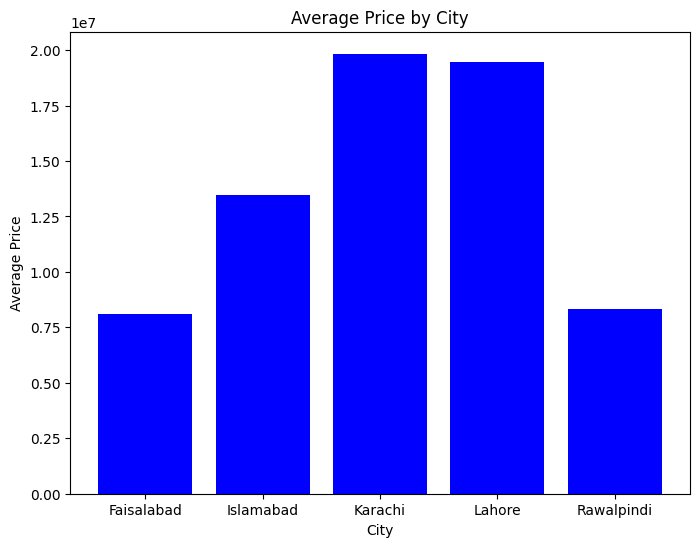

In [104]:
average_metrics = final_cleaned_data.groupby('city').agg({
    'price': 'mean',
    'area_in_marla': 'mean'
}).reset_index()

# Plotting Average Price by City
plt.figure(figsize=(8, 6))
plt.bar(average_metrics['city'], average_metrics['price'], color='blue')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

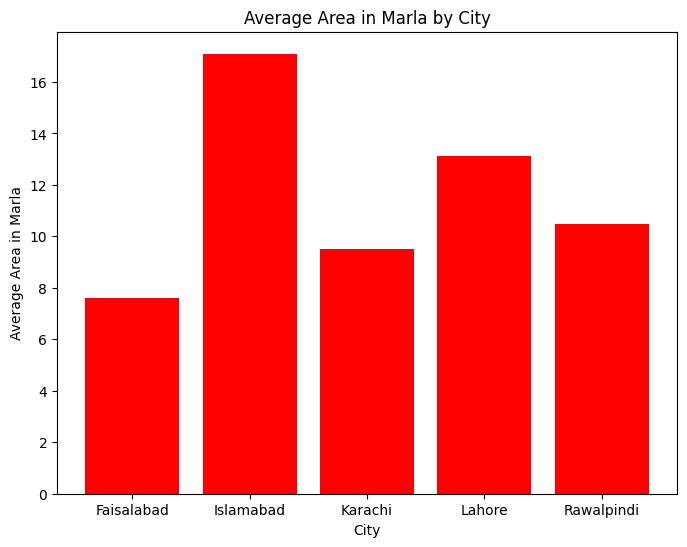

In [105]:
# Plotting Average Area in Marla by City
plt.figure(figsize=(8, 6))
plt.bar(average_metrics['city'], average_metrics['area_in_marla'], color='red')
plt.title('Average Area in Marla by City')
plt.xlabel('City')
plt.ylabel('Average Area in Marla')
plt.show()

In [106]:
# mean price grouped by city, and property type
price_grouped = final_cleaned_data.groupby(['city',  'property_type'])['price'].mean().reset_index()
price_grouped.sort_values(by=['city', 'price'], ascending=[True, True])

,city,property_type,price
6,Faisalabad,Upper Portion,3.902286e+04
3,Faisalabad,Lower Portion,5.724889e+04
5,Faisalabad,Room,1.988939e+05
1,Faisalabad,Flat,1.619891e+06
4,Faisalabad,Penthouse,4.436000e+06
2,Faisalabad,House,9.562508e+06
0,Faisalabad,Farm House,4.380000e+07
10,Islamabad,Lower Portion,5.706411e+04
13,Islamabad,Upper Portion,8.245381e+04
12,Islamabad,Room,1.833018e+05


### **Business Questions**




1.   Which city shows the highest growth in high-value properties (properties above a certain price threshold) over the years?
2.   What are the most popular property types in each city, and how has this preference changed over time?
3.  How do property prices vary with the number of bedrooms across different cities and property types?

4.  Which agencies have the most listings in high-demand areas (specific locations or cities)?

5.  Is there a seasonal trend in property listings?

6.  How do the sizes of properties (in marla) correlate with their prices across different cities and property types?

7.  Which property types are more prevalent in certain provinces, and how does this distribution impact property prices?

8.  How does the number of bathrooms influence property prices in different cities?

9.  What is the distribution of properties listed for different purposes (e.g., for sale, for rent) across various cities?

10.  Which agents are most active in high-value property markets?



#### 1. The city with the highest growth in high-value properties

The city with the highest growth in high-value properties is Karachi with a growth of 5088.0 properties.


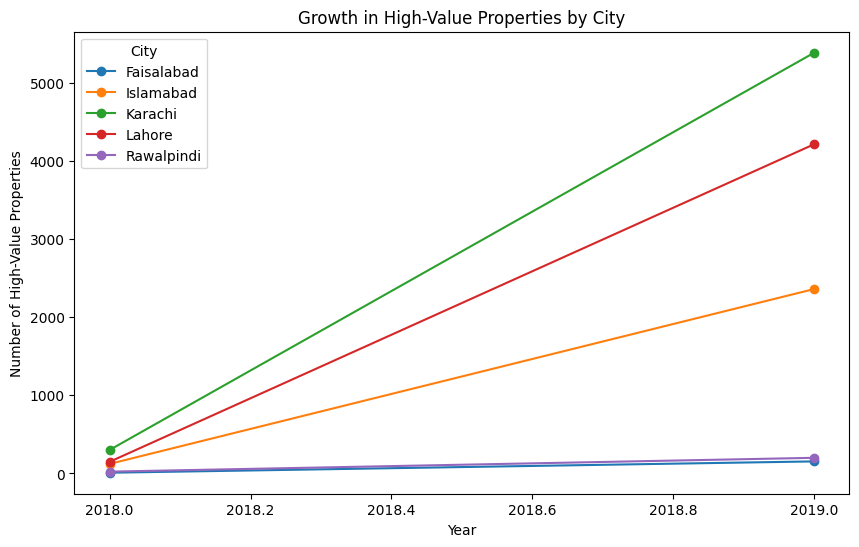

In [122]:
# high-value threshold properties above 50 million

high_value_threshold = 50000000
high_value_data = final_cleaned_data[final_cleaned_data['price'] > high_value_threshold]
high_value_growth = high_value_data.groupby(['city', 'year_added']).size().reset_index(name='property_count')
high_value_growth['growth'] = high_value_growth.groupby('city')['property_count'].diff()
highest_growth_city = high_value_growth.loc[high_value_growth['growth'].idxmax()]


print(f"The city with the highest growth in high-value properties is {highest_growth_city['city']} with a growth of {highest_growth_city['growth']} properties.")


plt.figure(figsize=(10, 6))
for city in high_value_growth['city'].unique():
    city_data = high_value_growth[high_value_growth['city'] == city]
    plt.plot(city_data['year_added'], city_data['property_count'], marker='o', label=city)

plt.title('Growth in High-Value Properties by City')
plt.xlabel('Year')
plt.ylabel('Number of High-Value Properties')
plt.legend(title='City')
plt.show()

#### 2. Most Popular Property Types by City Over Time

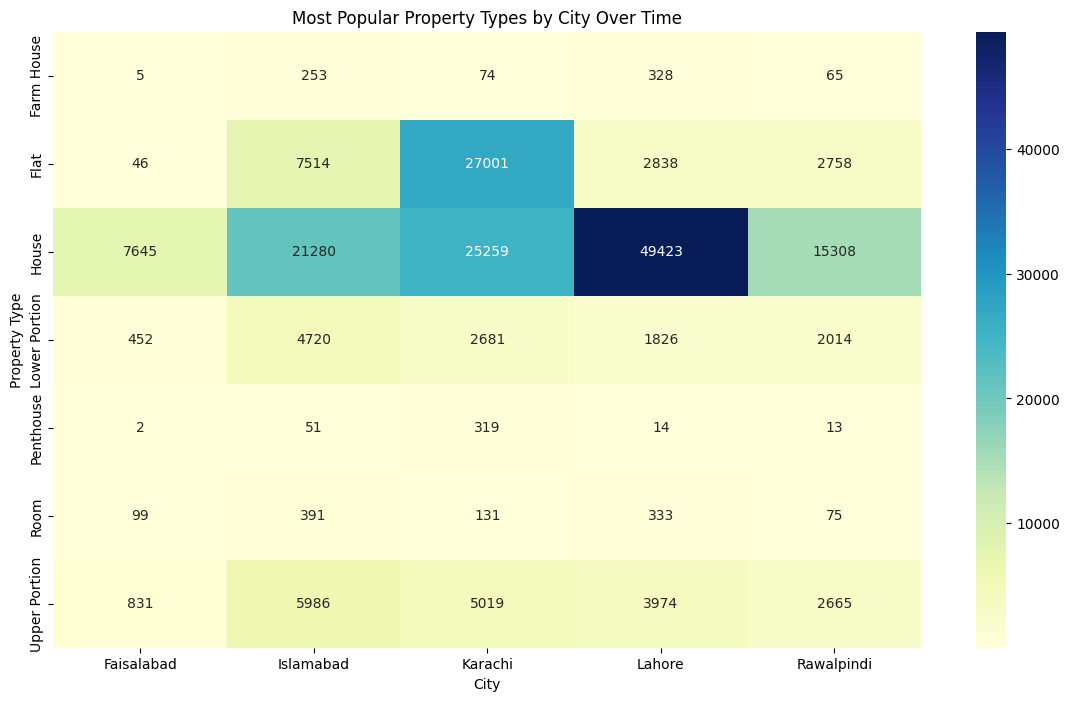

In [121]:
property_type_trends = final_cleaned_data.groupby(['city', 'year_added', 'property_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.heatmap(property_type_trends.pivot_table(index='property_type', columns='city', values='count', aggfunc='sum', fill_value=0),
            cmap="YlGnBu", annot=True, fmt="d")
plt.title('Most Popular Property Types by City Over Time')
plt.xlabel('City')
plt.ylabel('Property Type')
plt.show()

#### 3. Variation in Prices of Properties by number of bedrooms across cities

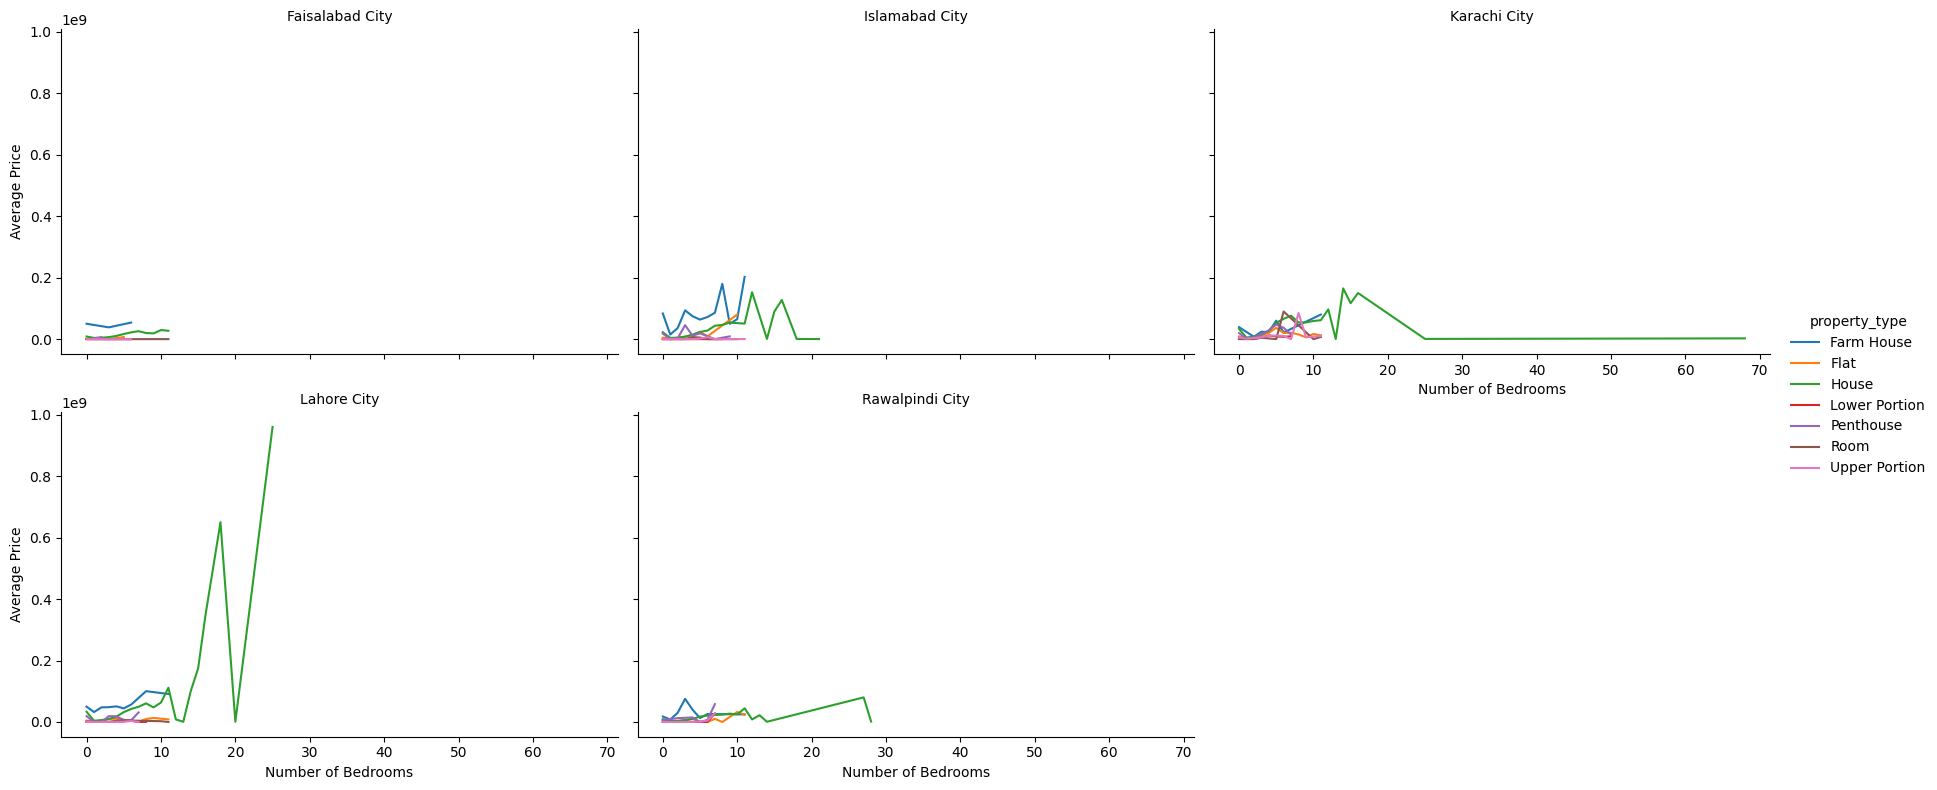

In [109]:
price_bedroom_variation = final_cleaned_data.groupby(['city', 'property_type', 'bedrooms'])['price'].mean().reset_index()
g = sns.FacetGrid(price_bedroom_variation, col="city", hue="property_type", col_wrap=3, height=4, aspect=1.5)
g.map(sns.lineplot, 'bedrooms', 'price')
g.add_legend()
g.set_axis_labels("Number of Bedrooms", "Average Price")
g.set_titles("{col_name} City")
plt.show()

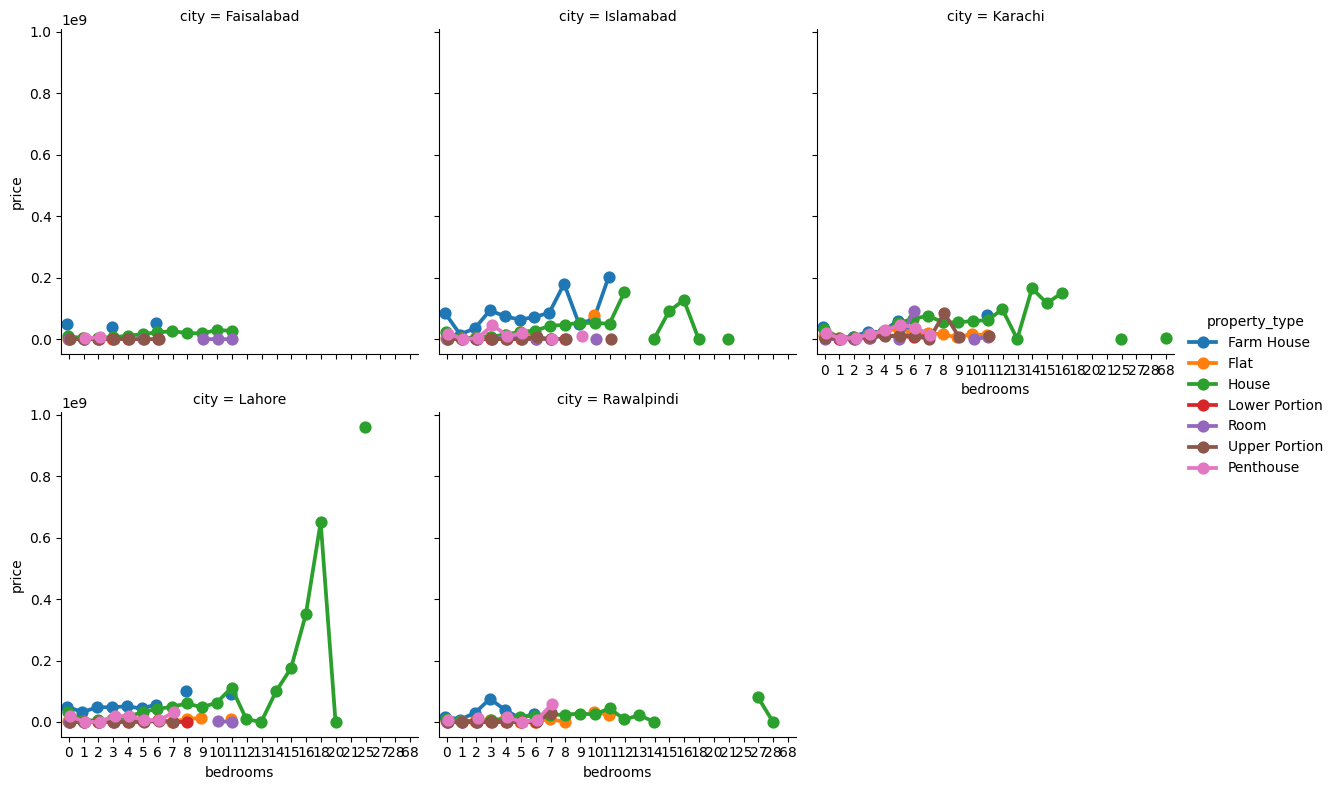

In [120]:
sns.catplot(
    data=price_bedroom_variation,
    x="bedrooms", y="price",
    hue="property_type",
    col="city", col_wrap=3,
    kind="point", dodge=True,
    height=4
)
plt.show()


#### 4. Top Agencies in High-Demand Areas

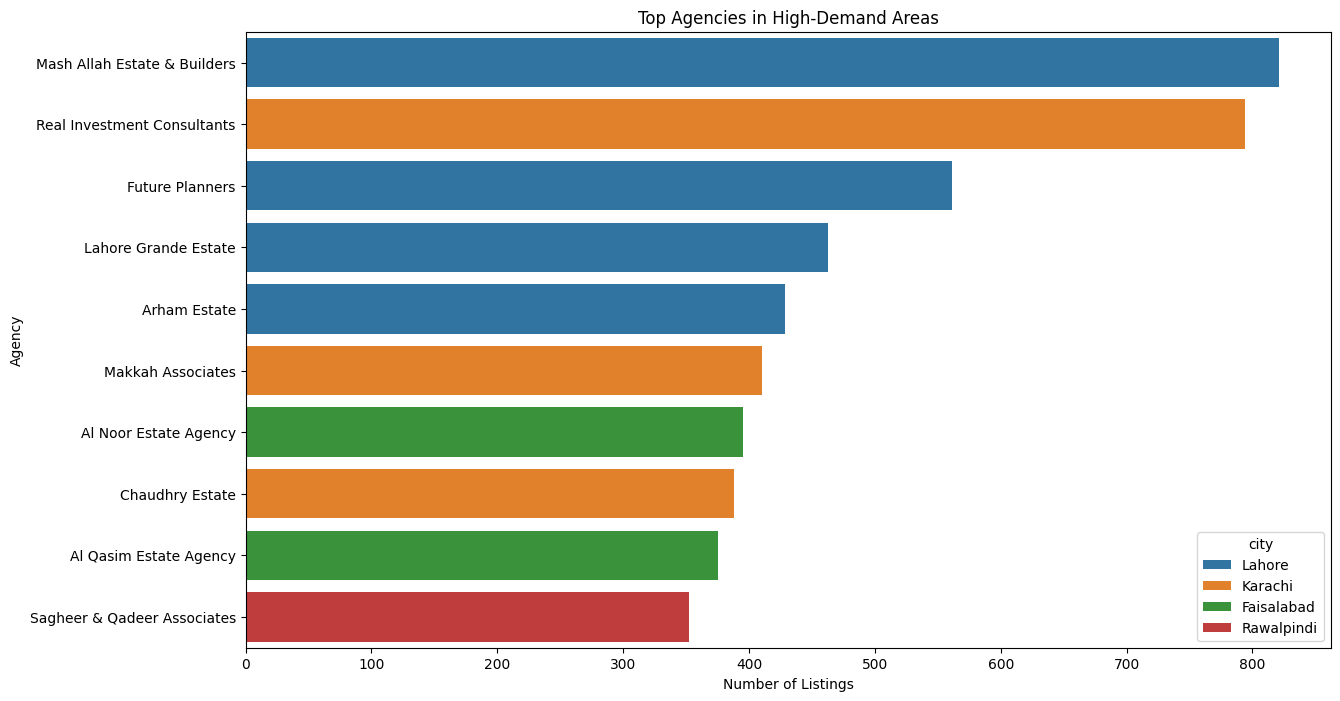

In [110]:
high_demand_areas = final_cleaned_data[final_cleaned_data['city'].isin(['Karachi', 'Lahore', 'Rawalpindi', 'Islamabad', 'Faisalabad'])]
agency_listings = high_demand_areas.groupby(['agency', 'city']).size().reset_index(name='listing_count')
plt.figure(figsize=(14, 8))
sns.barplot(x='listing_count', y='agency', hue='city', data=agency_listings.sort_values('listing_count', ascending=False).head(10))
plt.title('Top Agencies in High-Demand Areas')
plt.xlabel('Number of Listings')
plt.ylabel('Agency')
plt.show()


#### 5. Seasonal Trend in Property Listings

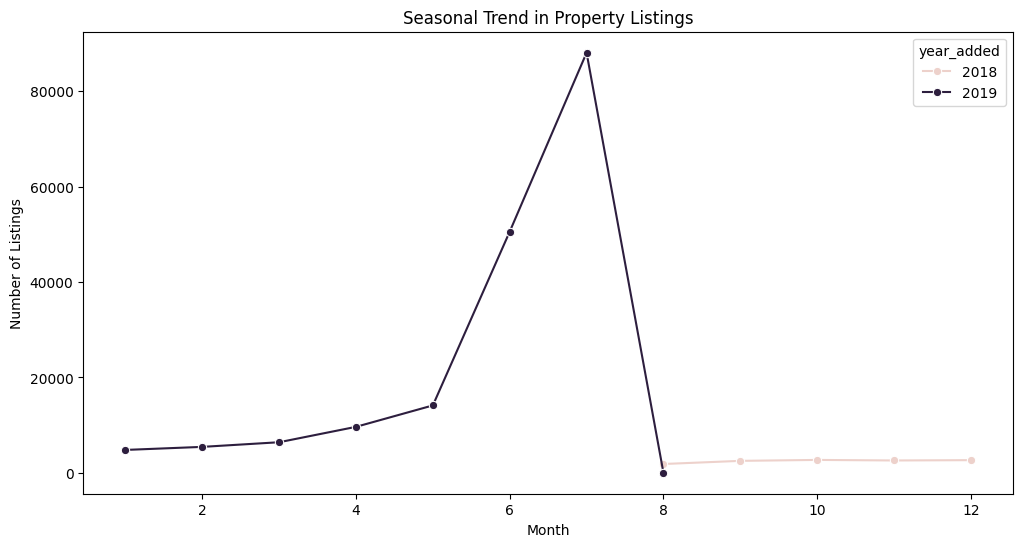

In [111]:
final_cleaned_data['month_added'] = final_cleaned_data['date_added'].dt.month
seasonal_trend = final_cleaned_data.groupby(['year_added', 'month_added']).size().reset_index(name='listing_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_trend, x='month_added', y='listing_count', hue='year_added', marker='o')
plt.title('Seasonal Trend in Property Listings')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.show()

#### 6. The Correlation of Sizes of properties (in marla) with their prices across different cities and property types

<Axes: xlabel='property_type', ylabel='city'>

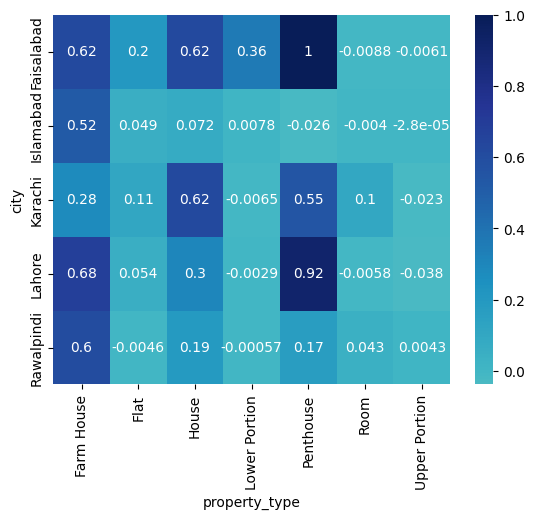

In [112]:
size_price_correlation = final_cleaned_data.groupby(['city', 'property_type']).apply(
    lambda df: df['area_in_marla'].corr(df['price'])
).reset_index(name='correlation')

# column for correlation strength showing/indicating
correlation_threshold = 0.5
size_price_correlation['correlation_strength'] = size_price_correlation['correlation'].apply(
    lambda x: 'Highly Correlated' if abs(x) >= correlation_threshold else 'Less Correlated'
)

corr_matrix = size_price_correlation.pivot(index='city', columns='property_type', values='correlation')
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', center=0)


In [113]:
size_price_correlation

,city,property_type,correlation,correlation_strength
0,Faisalabad,Farm House,0.616070,Highly Correlated
1,Faisalabad,Flat,0.204536,Less Correlated
2,Faisalabad,House,0.615024,Highly Correlated
3,Faisalabad,Lower Portion,0.361062,Less Correlated
4,Faisalabad,Penthouse,1.000000,Highly Correlated
5,Faisalabad,Room,-0.008841,Less Correlated
6,Faisalabad,Upper Portion,-0.006140,Less Correlated
7,Islamabad,Farm House,0.520945,Highly Correlated
8,Islamabad,Flat,0.048565,Less Correlated
9,Islamabad,House,0.071873,Less Correlated


#### 7. Property Type Prevalence by Province

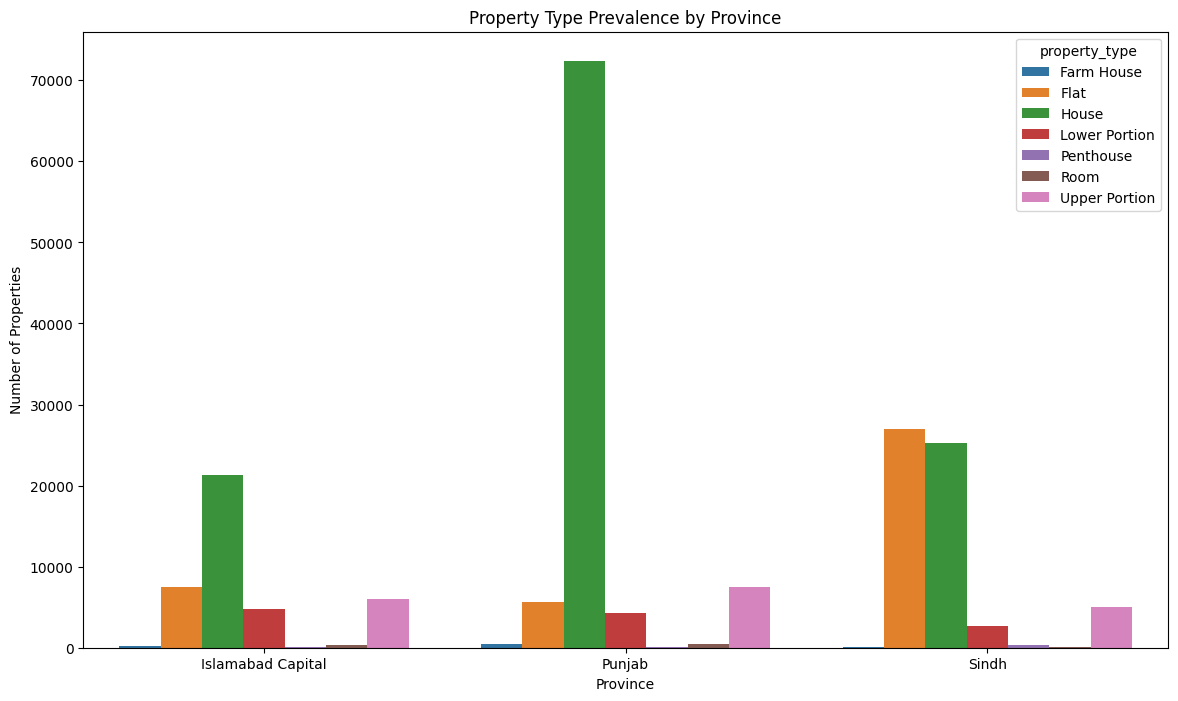

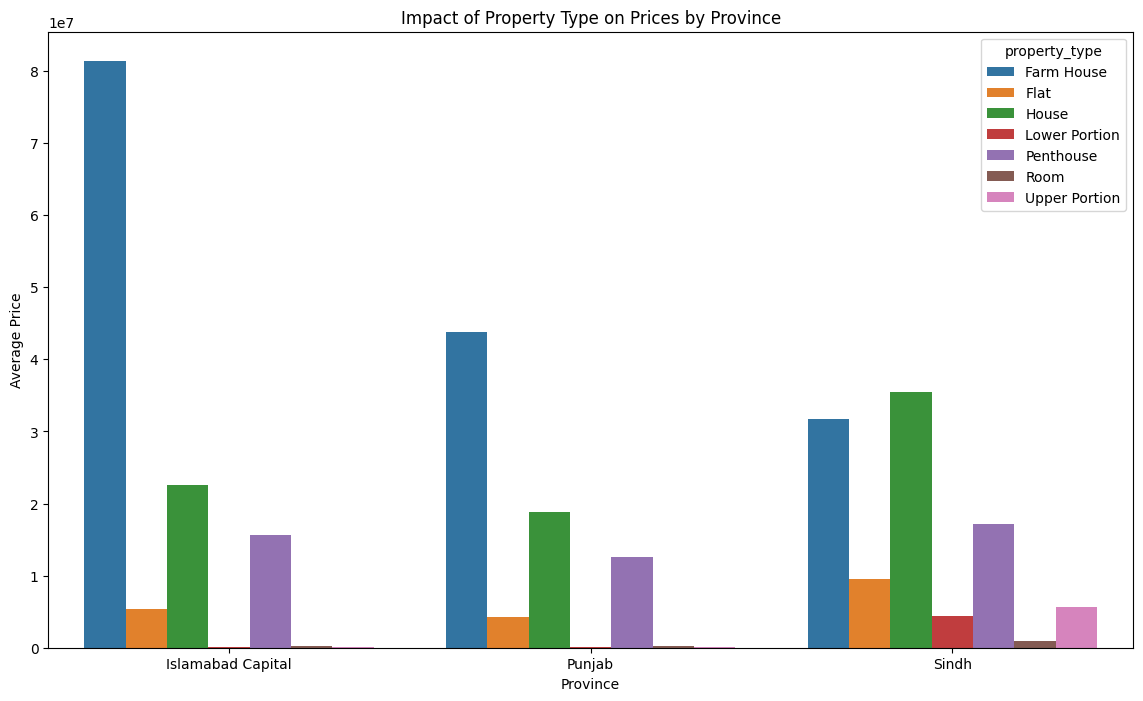

In [114]:
province_property_distribution = final_cleaned_data.groupby(['province_name', 'property_type']).agg(
    count=('property_type', 'size'),
    avg_price=('price', 'mean')
).reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(data=province_property_distribution, x='province_name', y='count', hue='property_type')
plt.title('Property Type Prevalence by Province')
plt.xlabel('Province')
plt.ylabel('Number of Properties')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(data=province_property_distribution, x='province_name', y='avg_price', hue='property_type')
plt.title('Impact of Property Type on Prices by Province')
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.show()

#### 8. Influence of Number of Bathrooms on Property Prices by City

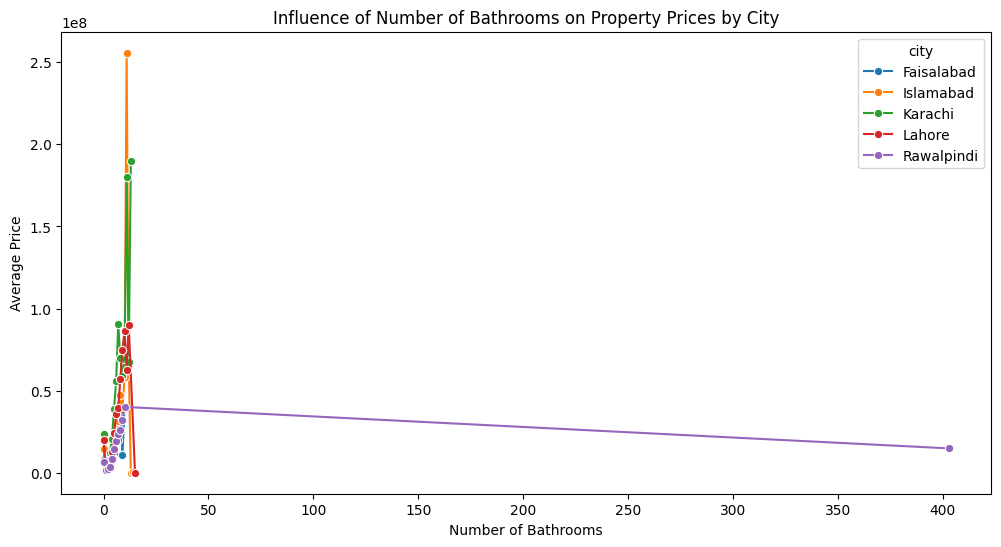

In [115]:
bathroom_price_influence = final_cleaned_data.groupby(['city', 'baths'])['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=bathroom_price_influence, x='baths', y='price', hue='city', marker='o')
plt.title('Influence of Number of Bathrooms on Property Prices by City')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()


#### 9. Distribution of Property Purposes Across Cities

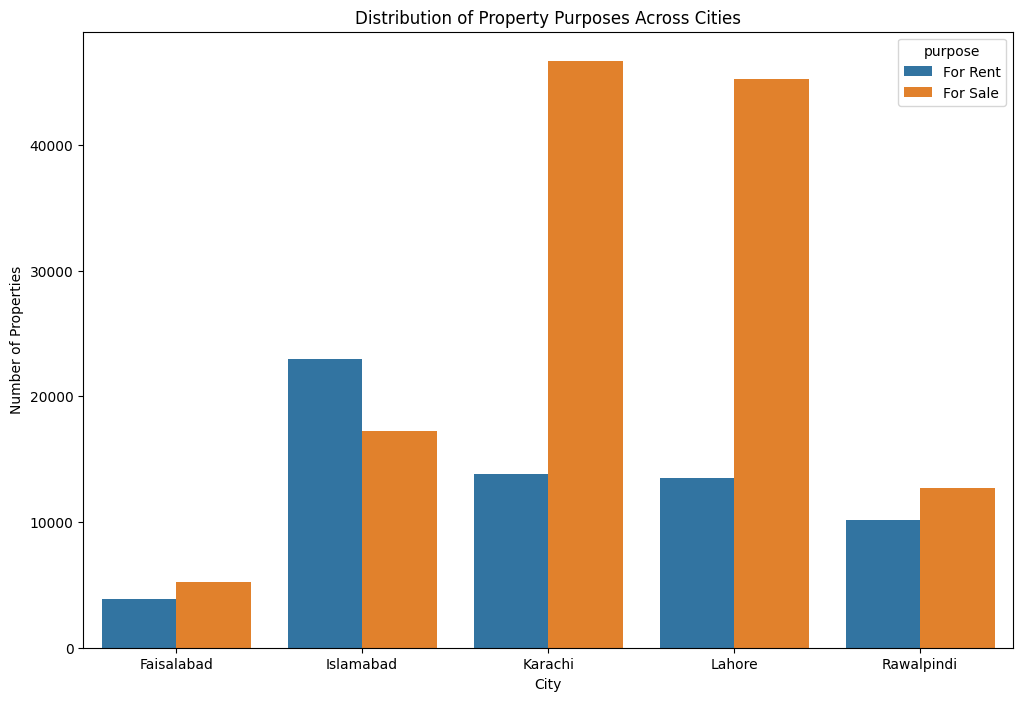

In [116]:
purpose_distribution = final_cleaned_data.groupby(['city', 'purpose']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(data=purpose_distribution, x='city', y='count', hue='purpose')
plt.title('Distribution of Property Purposes Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.show()

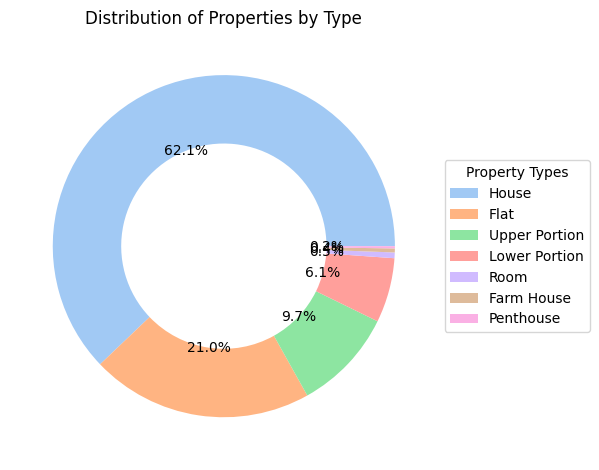

In [117]:
property_type_distribution = final_cleaned_data['property_type'].value_counts()

plt.pie(property_type_distribution, autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), wedgeprops={'width':0.4})
plt.legend(property_type_distribution.index, title="Property Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Properties by Type')
plt.tight_layout()
plt.show()


#### 10. Most Active Agents in High-Value Property Markets

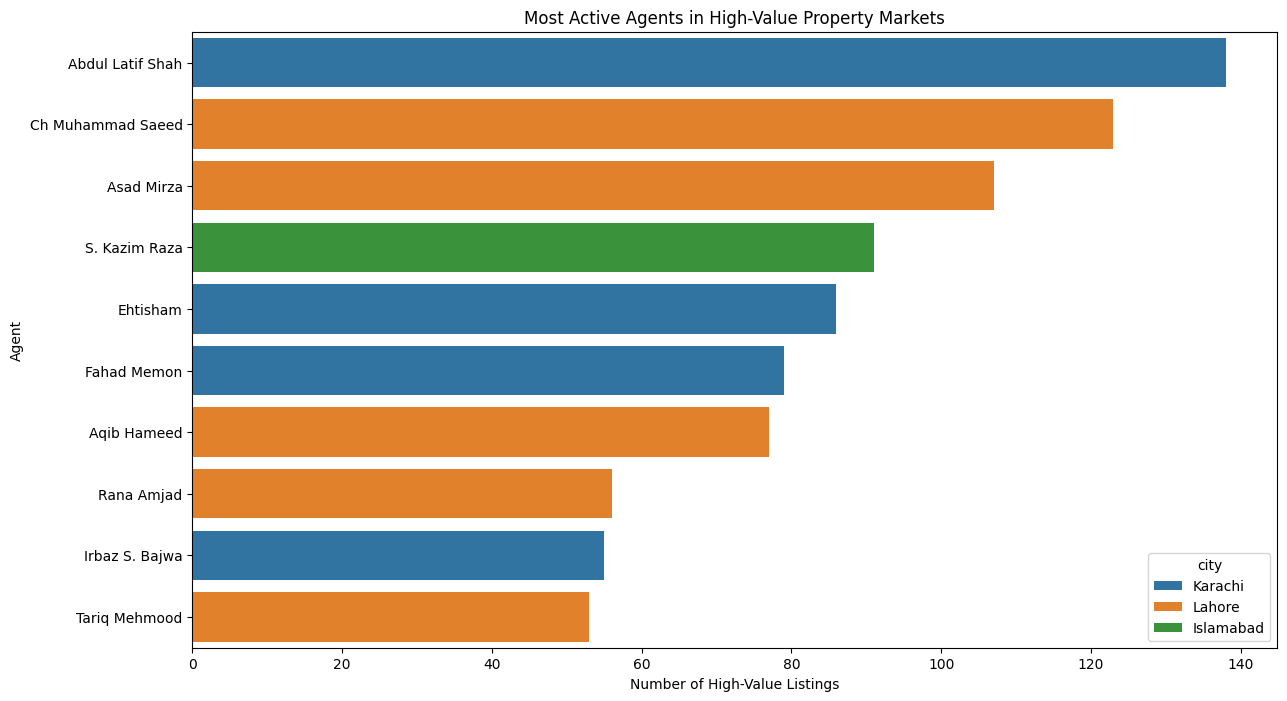

In [118]:
high_value_data = final_cleaned_data[final_cleaned_data['price'] > high_value_threshold]
active_agents = high_value_data.groupby(['agent', 'city']).size().reset_index(name='listing_count')

plt.figure(figsize=(14, 8))
sns.barplot(data=active_agents.sort_values('listing_count', ascending=False).head(10), x='listing_count', y='agent', hue='city')
plt.title('Most Active Agents in High-Value Property Markets')
plt.xlabel('Number of High-Value Listings')
plt.ylabel('Agent')
plt.show()